# **Heart Attack Prediction Analysis**
> *author:* **Arnab Saha**

## **Dataset:** https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset?select=heart.csv

## **Walkthrough:**
> 1. Importing Libraries
2. Import Data
3. Visualization(Graph Plots)
4. Outlier Detection & Treatment
5. Correlation Finding
6. Final Analysis



# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

from scipy.stats import zscore

# Data

In [2]:
df = pd.read_csv('/content/heart.csv')

In [3]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# Visualization

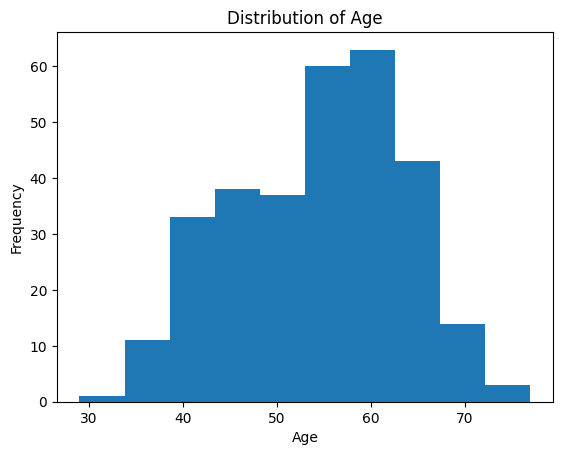

In [5]:
# Histogram for age distribution
plt.hist(df["age"])
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Distribution of Age")
plt.show()

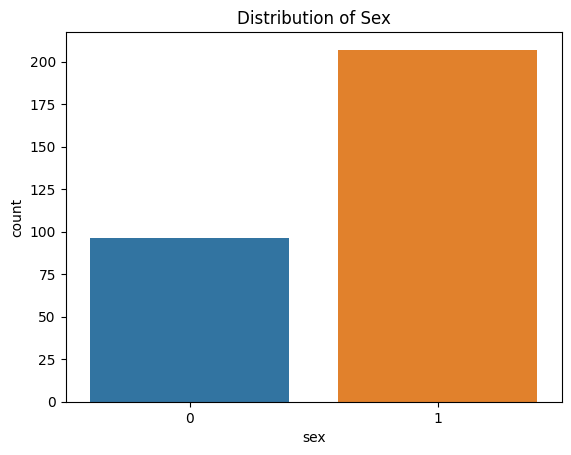

In [6]:
# Bar chart for sex distribution
sns.countplot(x="sex", data=df)
plt.title("Distribution of Sex")
plt.show()

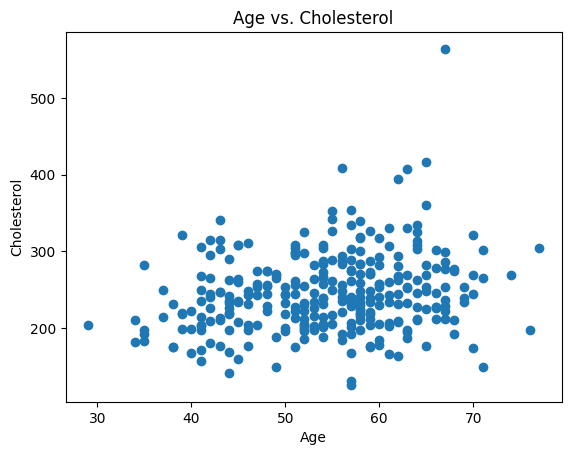

In [7]:
# Scatter plot for age vs. cholesterol
plt.scatter(df["age"], df["chol"])
plt.xlabel("Age")
plt.ylabel("Cholesterol")
plt.title("Age vs. Cholesterol")
plt.show()

# Outlier Detection

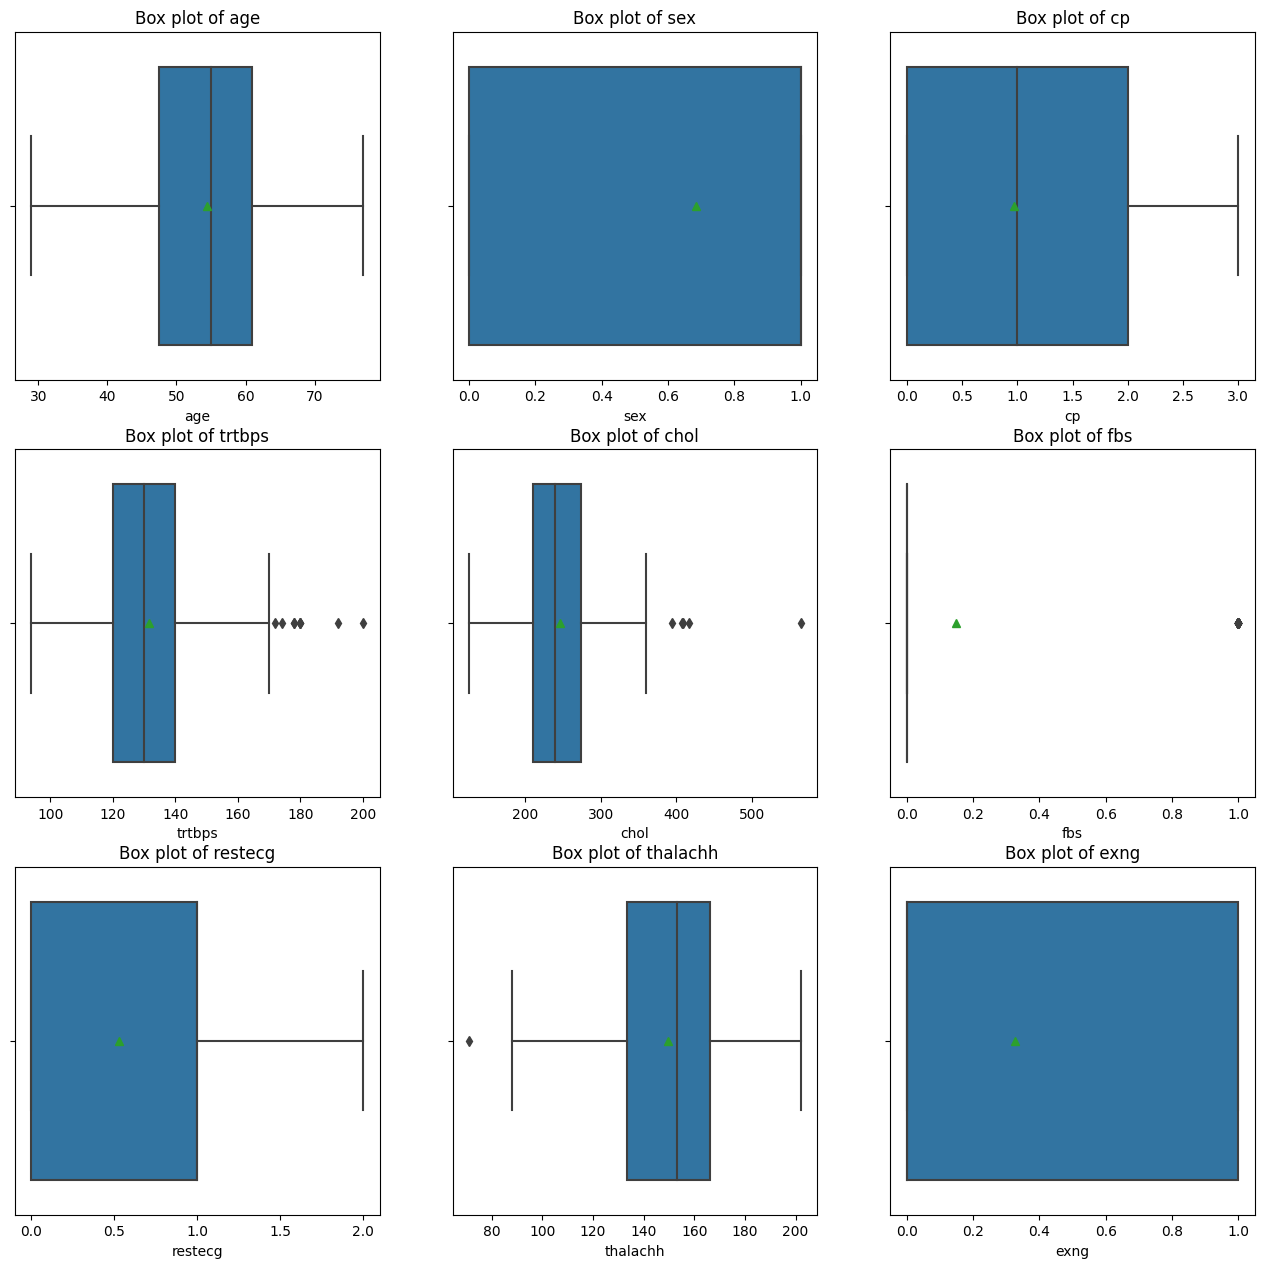

In [8]:

plt.figure(figsize=(16,7))
for i,j in zip(range(1,10), df):
  plt.subplot(3,3,i)
  plt.subplots_adjust(right=0.9, top=1.8)
  sns.boxplot(data=df,showmeans=True, x=j)
  plt.title("Box plot of {}".format(j))

In [9]:
# Z-scores
df["zscores"] = zscore(df["age"])

In [10]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,zscores
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,0.952197
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,-1.915313
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,-1.474158
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0.180175
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0.290464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,0.290464
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,-1.033002
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,1.503641
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,0.290464


## IQR

In [11]:
def remove_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

for col in df.columns:
    df = remove_outliers_iqr(df, col)

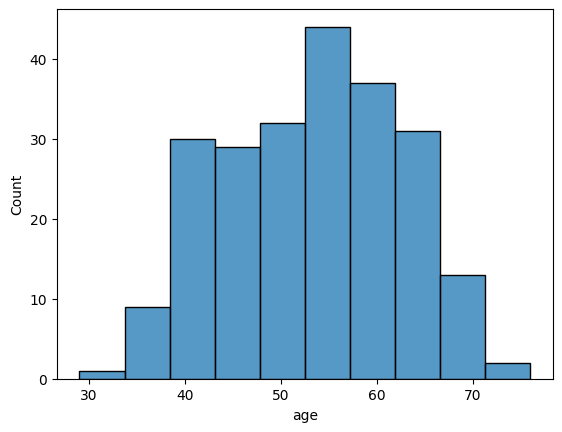

In [12]:
sns.histplot(x='age',data=df)
plt.show()

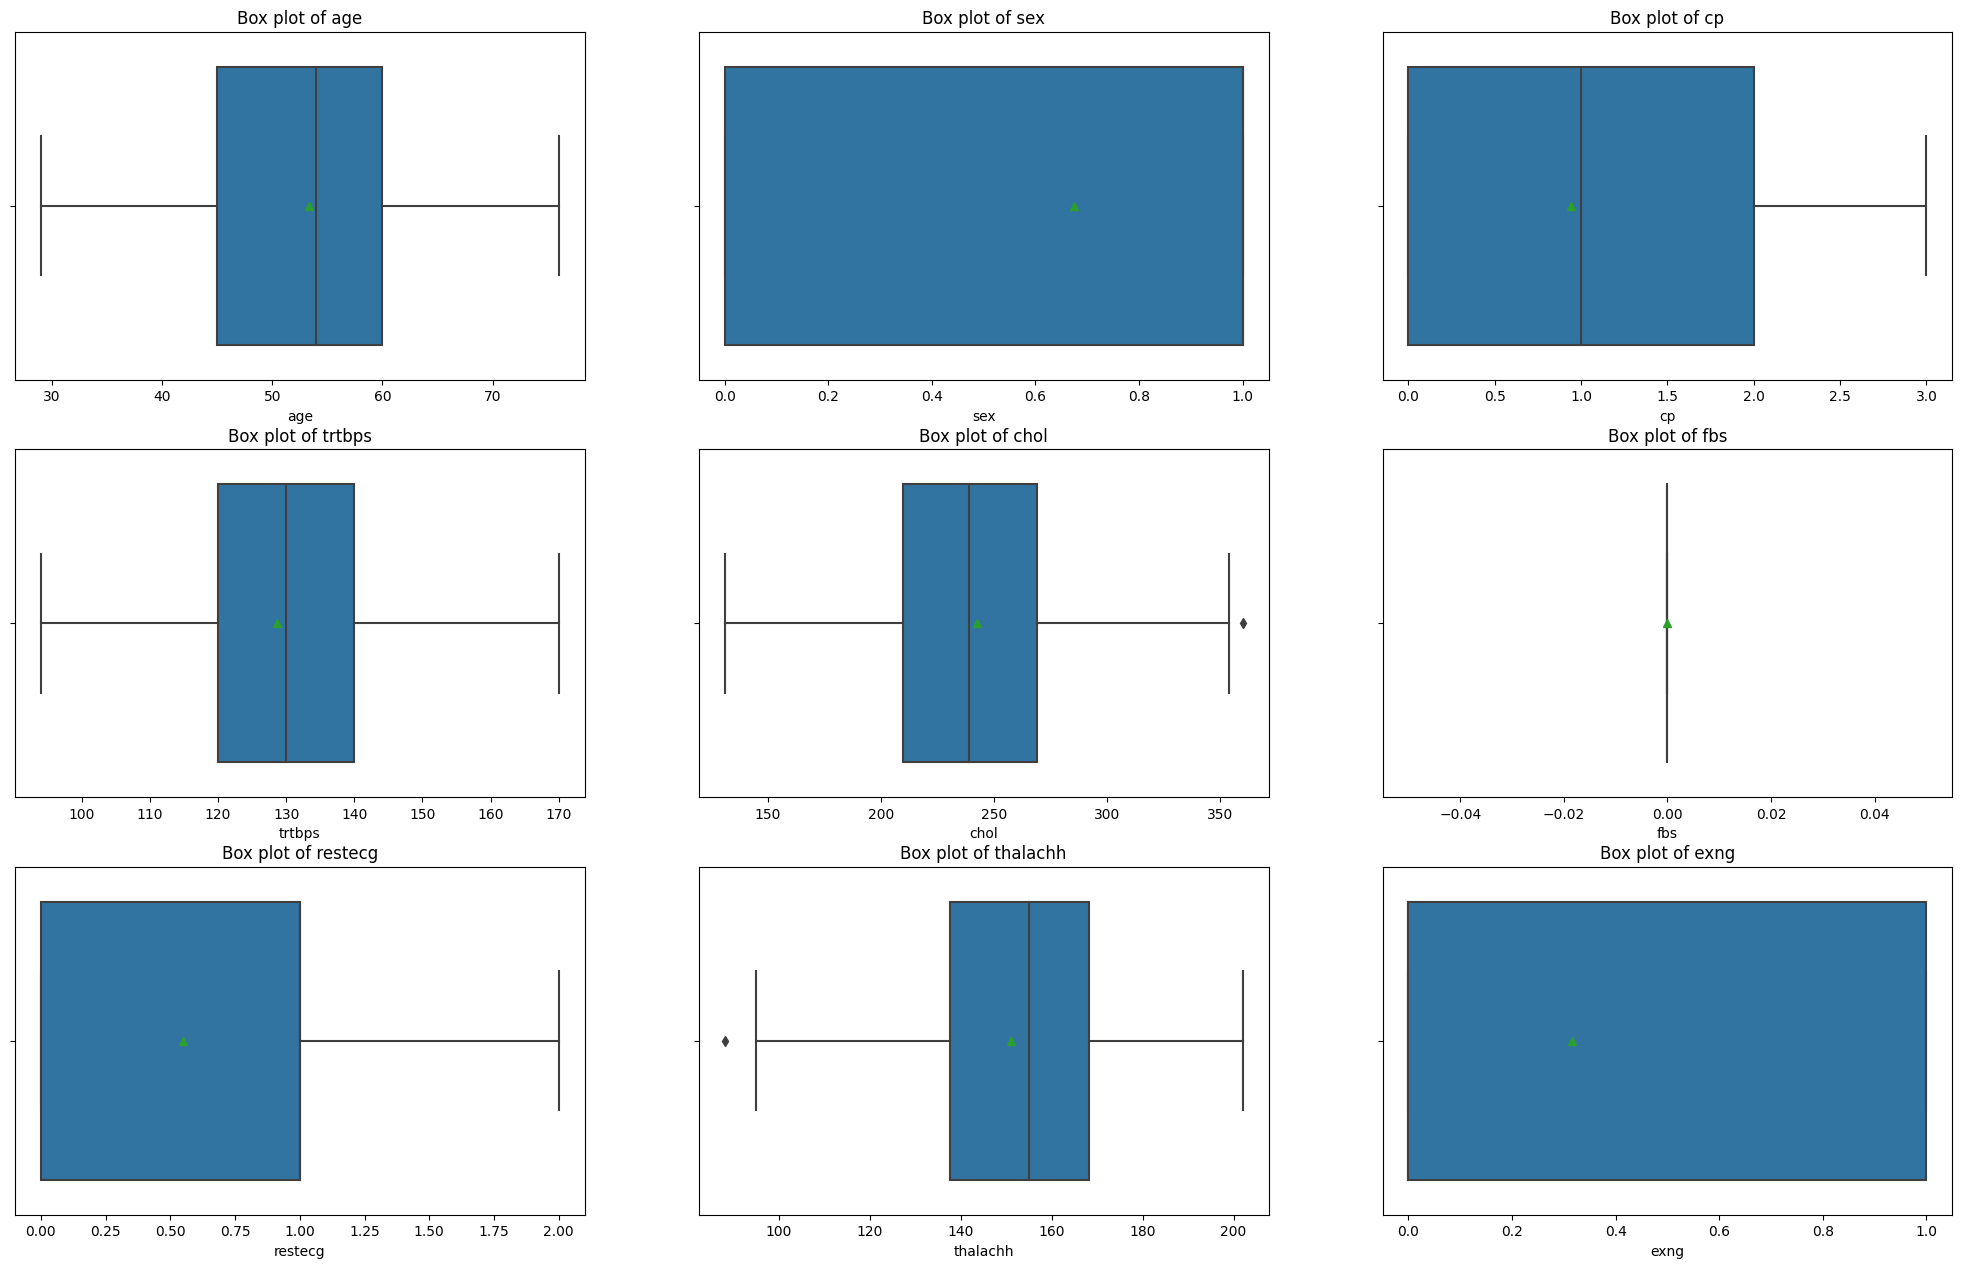

In [13]:

plt.figure(figsize=(25,7))
for i,j in zip(range(1,10), df):
  plt.subplot(3,3,i)
  plt.subplots_adjust(right=0.9, top=1.8)
  sns.boxplot(data=df,showmeans=True, x=j)
  plt.title("Box plot of {}".format(j))

In [16]:
df = df.drop('fbs', axis=1)

# Correlations

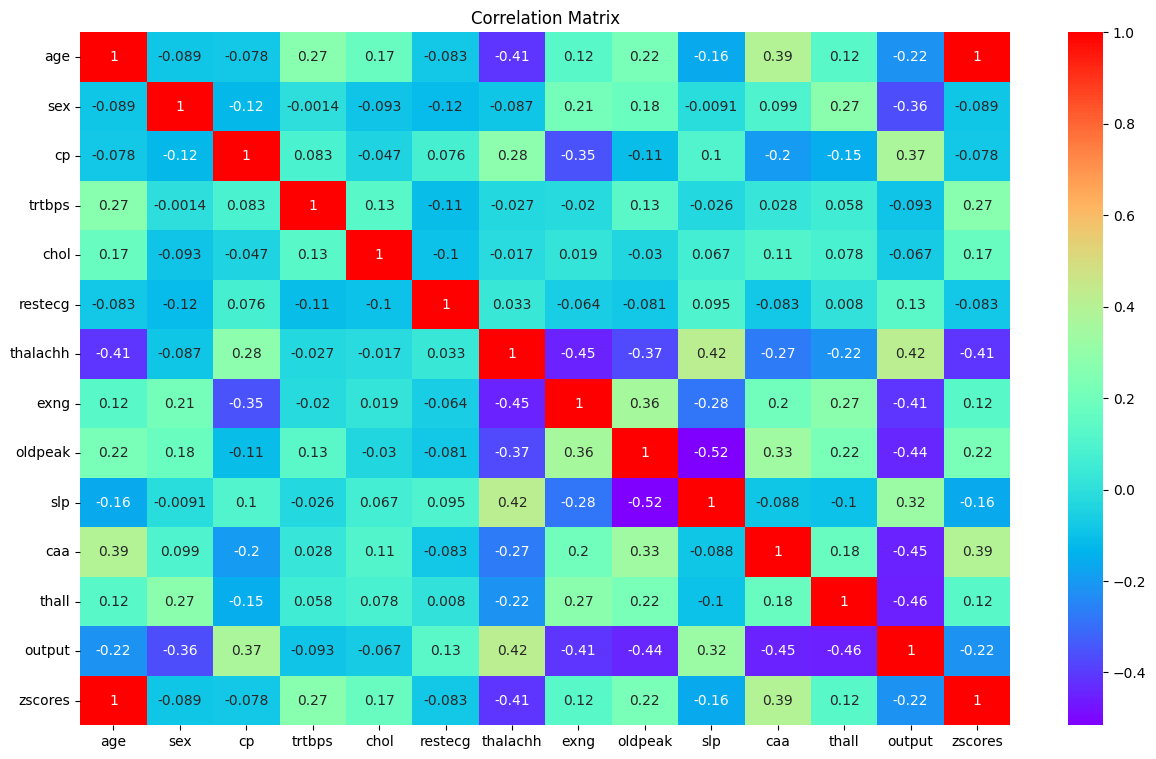

In [17]:
# Correlation matrix
figure(figsize=(15,9))
sns.heatmap(df.corr(),cmap='rainbow', annot=True)
plt.title("Correlation Matrix")
plt.show()

In [18]:
df.corr()

,age,sex,cp,trtbps,chol,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,zscores
age,1.000000,-0.088839,-0.078448,0.266698,0.172527,-0.082927,-0.413016,0.123981,0.219390,-0.161019,0.391099,0.124380,-0.215120,1.000000
sex,-0.088839,1.000000,-0.121648,-0.001433,-0.093058,-0.116956,-0.086734,0.208950,0.178690,-0.009104,0.099091,0.274262,-0.363483,-0.088839
cp,-0.078448,-0.121648,1.000000,0.083476,-0.047258,0.076362,0.277964,-0.351256,-0.108435,0.101887,-0.196373,-0.153325,0.371115,-0.078448
trtbps,0.266698,-0.001433,0.083476,1.000000,0.126974,-0.110594,-0.026792,-0.019909,0.131845,-0.026418,0.027864,0.057721,-0.092560,0.266698
chol,0.172527,-0.093058,-0.047258,0.126974,1.000000,-0.100622,-0.016899,0.019446,-0.030397,0.066865,0.108537,0.077890,-0.067321,0.172527
restecg,-0.082927,-0.116956,0.076362,-0.110594,-0.100622,1.000000,0.033100,-0.063645,-0.081251,0.094807,-0.082538,0.008018,0.131641,-0.082927
thalachh,-0.413016,-0.086734,0.277964,-0.026792,-0.016899,0.033100,1.000000,-0.449447,-0.372484,0.418646,-0.272552,-0.216389,0.417870,-0.413016
exng,0.123981,0.208950,-0.351256,-0.019909,0.019446,-0.063645,-0.449447,1.000000,0.358779,-0.281890,0.197251,0.274480,-0.414407,0.123981
oldpeak,0.219390,0.178690,-0.108435,0.131845,-0.030397,-0.081251,-0.372484,0.358779,1.000000,-0.515543,0.332854,0.220089,-0.439194,0.219390
slp,-0.161019,-0.009104,0.101887,-0.026418,0.066865,0.094807,0.418646,-0.281890,-0.515543,1.000000,-0.088348,-0.100647,0.323569,-0.161019


from matplotlib import pyplot as plt
_df_0['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['sex'].plot(kind='hist', bins=20, title='sex')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['cp'].plot(kind='hist', bins=20, title='cp')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['trtbps'].plot(kind='hist', bins=20, title='trtbps')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='age', y='sex', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='sex', y='cp', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='cp', y='trtbps', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='trtbps', y='chol', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['age'].plot(kind='line', figsize=(8, 4), title='age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['sex'].plot(kind='line', figsize=(8, 4), title='sex')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['cp'].plot(kind='line', figsize=(8, 4), title='cp')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['trtbps'].plot(kind='line', figsize=(8, 4), title='trtbps')
plt.gca().spines[['top', 'right']].set_visible(False)

# **Final Analysis:**


1. **Age & Cardio Risk:** Age correlates with higher blood pressure and max heart rate, indicating increased cardiovascular risk.

2. **Chest Pain & Assessment:** Chest pain links positively with max heart rate but negatively with heart attacks, emphasizing nuanced risk assessment.

3. **Limitations of Resting BP:** Resting blood pressure has weaker correlations with heart attacks, suggesting it's not a standalone predictor.

4. **Max Heart Rate & Aging:** Max heart rate negatively correlates with age, signifying age-related heart function decline in cardiovascular health assessment.

5. **Exercise Angina & Resilience:** Exercise-induced angina correlates negatively with heart attacks, suggesting potential protective roles.

6. **ST Depression & Factors:** ST depression correlates negatively with slope and max heart rate, illustrating intricate factors in heart attacks.

7. **Vessel Blockages & Age:** Major vessel blockages correlate positively with age, reinforcing lifelong risk management for older individuals.

8. **Thalassemia Connections:** Thalassemia correlates positively with exercise angina and max heart rate, warranting further investigation.

9. **Z-Scores & Age-Specific Risks:** Z-scores negatively correlate with age and heart attacks, highlighting distinct risk profiles for different age groups.

10. **Rethinking Chest Pain:** Complex relationships between chest pain, heart function, and heart attacks underscore the need for nuanced understanding and personalized risk assessments.